# Pre-processing and Spliting

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

health = pd.read_csv('cleaned_heart_2020.csv')

In [2]:
health.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Number,SleepGroups,BMIGroups
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,1.0,1,Very good,5.0,1,0,1,4,1-6,Thinness
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,0.0,1,Very good,7.0,0,0,0,4,7-12,Normal
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,1.0,1,Fair,8.0,1,0,0,2,7-12,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,0.0,0,Good,6.0,0,0,1,3,1-6,Normal
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,0.0,1,Very good,8.0,0,0,0,4,7-12,Normal


In [3]:
#convert yes/no columns to category type
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth_Number',
       'SleepGroups', 'BMIGroups']
for i in columns:
    health[i] = health[i].astype('category')

In [4]:
health.dtypes

HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
GenHealth_Number    category
SleepGroups         category
BMIGroups           category
dtype: object

In [4]:
#Create dummy or indicator features for categorical variables
dummy_df = pd.get_dummies(health[['AgeCategory','GenHealth','GenHealth_Number','SleepGroups','BMIGroups', 'Race']], drop_first = True)
df = pd.concat([health, dummy_df], axis=1) #combine the dfs
df = df.drop(['AgeCategory','GenHealth','GenHealth_Number','SleepGroups','BMIGroups','Race'], axis=1) #remove the original columns
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,BMIGroups_Obese,BMIGroups_Overweight,BMIGroups_Severe Thinness,BMIGroups_Severely Obese,BMIGroups_Thinness,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,1.0,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#Split data into testing and training datasets
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

In [6]:
#Standardize the magnitude of numeric features using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']] = scaler.fit_transform(X_train[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']].values)
X_test[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']] = scaler.transform(X_test[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']].values)

In [8]:
#scaled_features_df = pd.DataFrame(X_train_scaled, index=df.index, columns=['BMI_scaled', 'PhysicalHealth_scaled','MentalHealth_scaled', 'SleepTime_scaled'])
#scaled_df = df.drop(['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime'], axis=1).join(scaled_features_df) #combine the dfs and drop unscaled columns
#scaled_df.head()

# Modeling

Logistic Regression
 - ROC AUC Curve
 - Metrics

Gradient Boosting
 - ROC AUC Curve
 - Metrics
 - Feature Importance

Naive Bayes
 - ROC AUC Curve
 - Metrics

Decision Tree
 - ROC AUC Curve
 - Metrics
 - Feature Importance

Random Forest
 - ROC AUC Curve
 - Metrics
 - Feature Importance

Comparison

Hyperparameter Tuning

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 11) # Instantiate the model
logreg.fit(X_train, y_train) #fit the model
y_pred_log = logreg.predict(X_test)
y_pred_probs_log = logreg.predict_proba(X_test)[:, 1] # Predict probabilities of true by slicing the second column
print(y_pred_probs_log[:10]) #first 10 probabilities
#the probability of a heart disease diagnosis for the first 10 individuals in the test set ranges from 0.002 to 0.21.

[0.00255282 0.01611326 0.08404242 0.02556136 0.04742623 0.07239188
 0.07214192 0.0594722  0.20700899 0.16076936]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


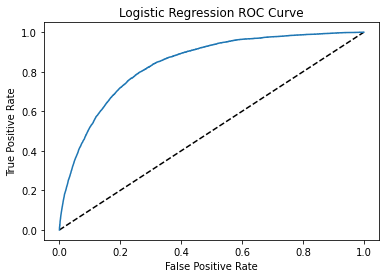

Logistic Regression confusion matrix 
 [[57992   492]
 [ 4884   591]]
Logistic Regression classification report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.55      0.11      0.18      5475

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959

Logistic Regression ROC AUC score: 0.8406818490574168
Logistic Regression Accuracy: 0.9159461530042684
Logistic Regression f1-score: 0.8893209820546414
Logistic Regression Recall score: 0.10794520547945205


In [8]:
#ROC Curve
#visualizes how the true positive rate (tpr) and false positive rate (fpr) vary as the decision threshold changes
#The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
#Classifiers that give curves closer to the top-left corner indicate a better performance.

from sklearn.metrics import roc_curve
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_probs_log)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_log, tpr_log) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_log = roc_auc_score(y_test, y_pred_probs_log)
recall_score_log = recall_score(y_test, y_pred_log)


print('Logistic Regression confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_log)) # Calculate the confusion matrix
print('Logistic Regression classification report' , '\n' , classification_report(y_test, y_pred_log)) # Calculate the classification report, which gives F1 score
print('Logistic Regression ROC AUC score:', roc_auc_log) # Calculate ROC AUC score
print('Logistic Regression Accuracy:' , accuracy_score(y_test, y_pred_log))
print('Logistic Regression f1-score:', f1_score(y_test, y_pred_log, average='weighted'))
print('Logistic Regression Recall score:' , recall_score_log)
# A ROC AUC score of 0.84 means this model is 84% better than a chance model at correctly predicting labels!

### Gradient Boosting

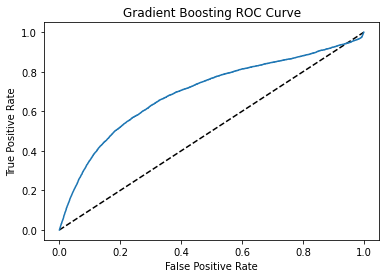

Gradient Boosting score 0.8888193999280789
Gradient Boosting confusion matrix 
 [[55765  2719]
 [ 4392  1083]]
Gradient Boosting classification report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     58484
           1       0.28      0.20      0.23      5475

    accuracy                           0.89     63959
   macro avg       0.61      0.58      0.59     63959
weighted avg       0.87      0.89      0.88     63959

Gradient Boosting ROC AUC score: 0.696420981080881
Gradient Boosting Accuracy: 0.8888193999280789
Gradient Boosting f1-score: 0.8795782292801974
Gradient Boosting Recall score: 0.1978082191780822


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0).fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_probs_gb = gb.predict_proba(X_test)[:, 1]

fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_pred_probs_gb)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_gb, tpr_gb) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_gb = roc_auc_score(y_test, y_pred_probs_gb)
recall_score_gb = recall_score(y_test, y_pred_gb)


print('Gradient Boosting score' , gb.score(X_test, y_test))
print('Gradient Boosting confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_gb)) # Calculate the confusion matrix
print('Gradient Boosting classification report' , '\n' , classification_report(y_test, y_pred_gb)) # Calculate the classification report, which gives F1 score
print('Gradient Boosting ROC AUC score:', roc_auc_gb)
print('Gradient Boosting Accuracy:' , accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting f1-score:', f1_score(y_test, y_pred_gb, average='weighted'))
print('Gradient Boosting Recall score:' , recall_score(y_test, y_pred_gb))

30


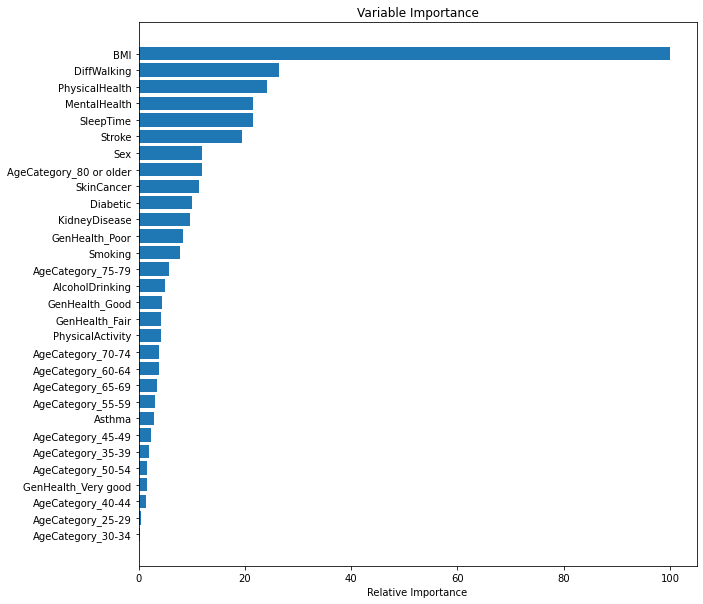

In [10]:
feature_importance_gb = gb.feature_importances_
# make importances relative to max importance
feature_importance_gb = 100.0 * (feature_importance_gb / feature_importance_gb.max())[:30]
sorted_idx = np.argsort(feature_importance_gb)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance_gb[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Naive Bayes

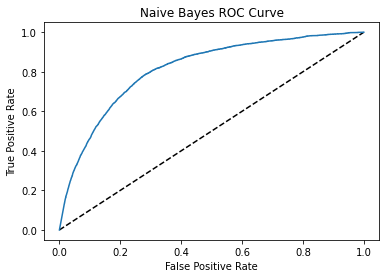

Naive Bayes confusion matrix 
 [[45953 12531]
 [ 1664  3811]]
Naive Bayes classification report 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     58484
           1       0.23      0.70      0.35      5475

    accuracy                           0.78     63959
   macro avg       0.60      0.74      0.61     63959
weighted avg       0.90      0.78      0.82     63959

Naive Bayes ROC AUC score: 0.8145819611436481
Naive Bayes Accuracy: 0.7780609452930783
Naive Bayes f1-score: 0.8219689834548302
Naive Bayes Recall score: 0.6960730593607306


In [11]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred_gnb = gnb.predict(X_test)
y_pred_probs_gnb = gnb.predict_proba(X_test)[:, 1]

fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_pred_probs_gnb)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_gnb, tpr_gnb) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_gnb = roc_auc_score(y_test, y_pred_probs_gnb)
recall_score_gnb = recall_score(y_test, y_pred_gnb)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Naive Bayes confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_gnb)) # Calculate the confusion matrix
print('Naive Bayes classification report' , '\n' , classification_report(y_test, y_pred_gnb)) # Calculate the classification report, which gives F1 score
print('Naive Bayes ROC AUC score:', roc_auc_gnb)
print('Naive Bayes Accuracy:' , accuracy_score(y_test, y_pred_gnb))
print('Naive Bayes f1-score:', f1_score(y_test, y_pred_gnb, average='weighted'))
print('Naive Bayes Recall score:' , recall_score(y_test, y_pred_gnb))

### Decision Tree

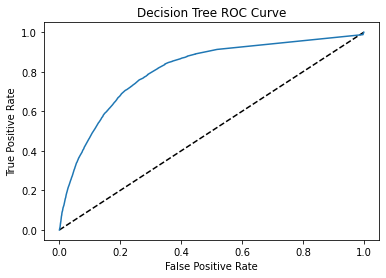

Decision Tree confusion matrix 
 [[57925   559]
 [ 4958   517]]
Decision Tree classification report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58484
           1       0.48      0.09      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.70      0.54      0.56     63959
weighted avg       0.88      0.91      0.89     63959

Decision Tree ROC AUC score: 0.808577519855565
Decision Tree Accuracy: 0.9137416157225723
Decision Tree f1-score: 0.886343576592258
Decision Tree Recall score: 0.09442922374429223


In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, max_depth=10)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
y_pred_probs_dtc = dtc.predict_proba(X_test)[:, 1]

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, y_pred_probs_dtc)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_dtc, tpr_dtc) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_dtc = roc_auc_score(y_test, y_pred_probs_dtc)
recall_score_dtc = recall_score(y_test, y_pred_dtc)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Decision Tree confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_dtc)) # Calculate the confusion matrix
print('Decision Tree classification report' , '\n' , classification_report(y_test, y_pred_dtc)) # Calculate the classification report, which gives F1 score
print('Decision Tree ROC AUC score:', roc_auc_dtc)
print('Decision Tree Accuracy:' , accuracy_score(y_test, y_pred_dtc))
print('Decision Tree f1-score:', f1_score(y_test, y_pred_dtc, average='weighted'))
print('Decision Tree Recall score:' , recall_score(y_test, y_pred_dtc))

30


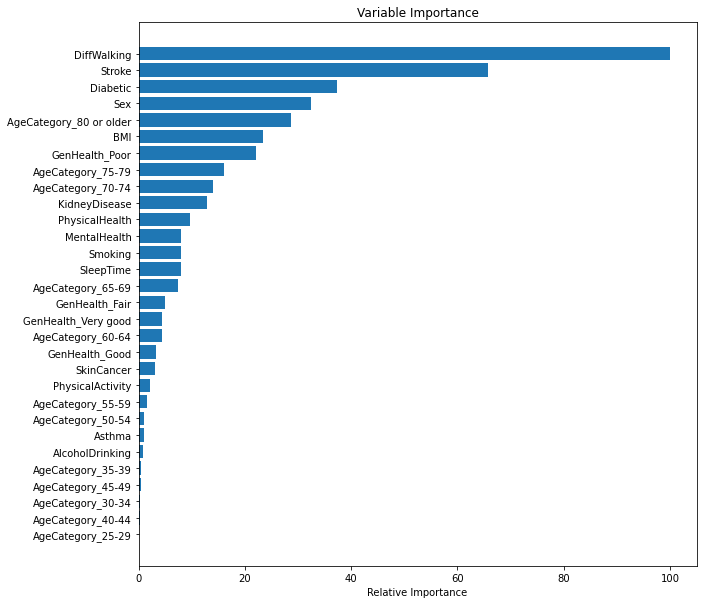

In [13]:
feature_importance_dtc = dtc.feature_importances_
# make importances relative to max importance
feature_importance_dtc = 100.0 * (feature_importance_dtc / feature_importance_dtc.max())[:30]
sorted_idx = np.argsort(feature_importance_dtc)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance_dtc[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Random Forest

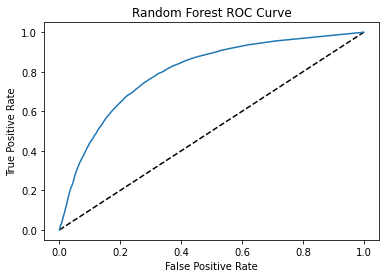

Random Forest confusion matrix 
 [[57325  1159]
 [ 4886   589]]
Random Forest classification report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.34      0.11      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.56     63959
weighted avg       0.87      0.91      0.88     63959

Random Forest ROC AUC score: 0.7981321761811918
Random Forest Accuracy: 0.9054863271783486
Random Forest f1-score: 0.8825615114732864
Random Forest Recall score: 0.10757990867579909


In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_probs_rfc = rfc.predict_proba(X_test)[:,1]

#ROC Curve
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, y_pred_probs_rfc)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_rfc, tpr_rfc) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_rfc = roc_auc_score(y_test, y_pred_probs_rfc)
recall_score_rfc = recall_score(y_test, y_pred_rfc)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Random Forest confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_rfc)) # Calculate the confusion matrix
print('Random Forest classification report' , '\n' , classification_report(y_test, y_pred_rfc)) # Calculate the classification report, which gives F1 score
print('Random Forest ROC AUC score:', roc_auc_rfc)
print('Random Forest Accuracy:' , accuracy_score(y_test, y_pred_rfc))
print('Random Forest f1-score:', f1_score(y_test, y_pred_rfc, average='weighted'))
print('Random Forest Recall score:' , recall_score(y_test, y_pred_rfc))

30


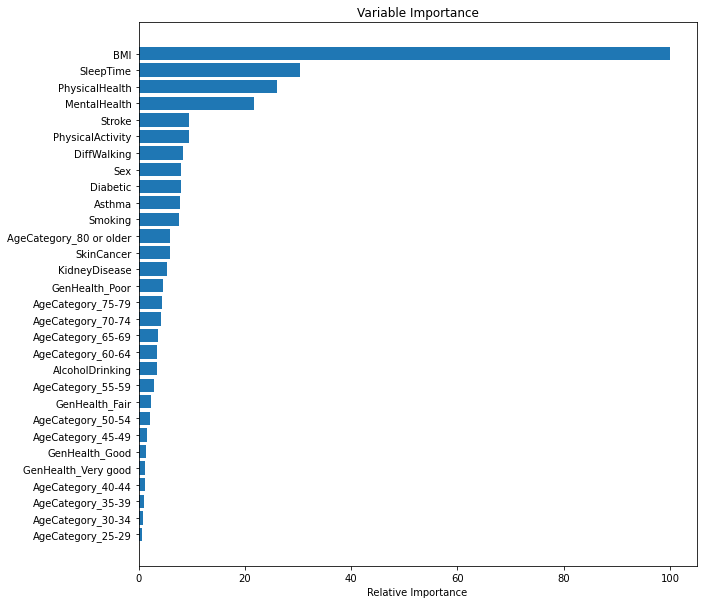

In [15]:
feature_importance_rfc = rfc.feature_importances_
# make importances relative to max importance
feature_importance_rfc = 100.0 * (feature_importance_rfc / feature_importance_rfc.max())[:30]
sorted_idx = np.argsort(feature_importance_rfc)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance_rfc[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Comparison of Models

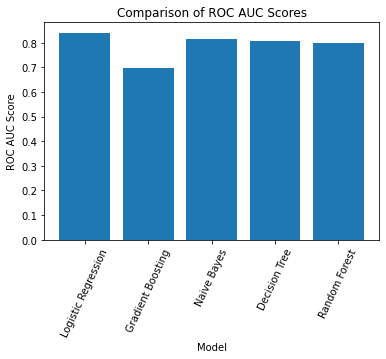

In [16]:
models = ['Logistic Regression','Gradient Boosting','Naive Bayes','Decision Tree','Random Forest']
roc_auc_scores = [roc_auc_log, roc_auc_gb,roc_auc_gnb,roc_auc_dtc,roc_auc_rfc]

_ = plt.bar(models, roc_auc_scores)
_ = plt.title("Comparison of ROC AUC Scores")
_ = plt.xlabel('Model')
_ = plt.ylabel('ROC AUC Score')
_ = plt.xticks(rotation = 65)

In [17]:
roc_auc_df = pd.DataFrame(list(zip(models, roc_auc_scores)),
               columns =['Model', 'ROC AUC Score'])
roc_auc_df

,Model,ROC AUC Score
0,Logistic Regression,0.840682
1,Gradient Boosting,0.696421
2,Naive Bayes,0.814582
3,Decision Tree,0.808578
4,Random Forest,0.798132


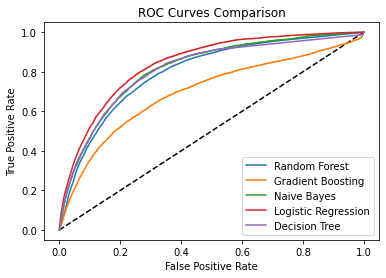

In [18]:
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boosting')
plt.plot(fpr_gnb, tpr_gnb, label = 'Naive Bayes')
plt.plot(fpr_log, tpr_log, label = 'Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, label = 'Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

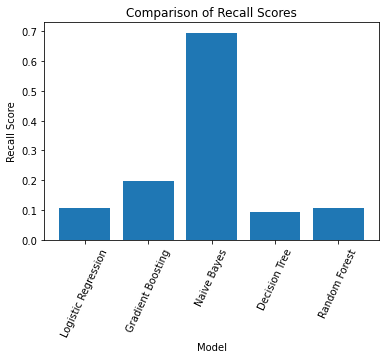

In [19]:
models = ['Logistic Regression','Gradient Boosting','Naive Bayes','Decision Tree','Random Forest']
recall_scores = [recall_score_log, recall_score_gb, recall_score_gnb,recall_score_dtc,recall_score_rfc]

_ = plt.bar(models, recall_scores)
_ = plt.title("Comparison of Recall Scores")
_ = plt.xlabel('Model')
_ = plt.ylabel('Recall Score')
_ = plt.xticks(rotation = 65)

In [20]:
recall_df = pd.DataFrame(list(zip(models, recall_scores)),
               columns =['Model', 'Recall Score'])
recall_df

,Model,Recall Score
0,Logistic Regression,0.107945
1,Gradient Boosting,0.197808
2,Naive Bayes,0.696073
3,Decision Tree,0.094429
4,Random Forest,0.107580


We care most about Recall because we want to minimize the number of false negatives.  In other words, we don't want to say a person is healthy (no heart disease) when they actually have a high chance of having heart disease.  Therefore, we are going to choose the Naive Bayes model and tune it further to improve our results.  The next highest recall score is from Gradient Boosting, so we will tune it as well.

# Hyperparameter Tuning

## Naive Bayes

In [23]:
param_grid_nb = {
    'var_smoothing': np.logspace(1,-9, num=100)
}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gnb_grid = RandomizedSearchCV(GaussianNB(), param_grid_nb, cv=10, scoring="recall", verbose=1, n_jobs=-1)
gnb_grid.fit(X_train, y_train)
print(gnb_grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'var_smoothing': 0.002915053062825176}


In [24]:
#retraining with best hyperparameters
gnb_tuned = GaussianNB(var_smoothing=0.002915053062825176)
gnb_tuned.fit(X_train, y_train)

# making predictions on the testing set
y_pred_gnb_tuned = gnb_tuned.predict(X_test)
y_pred_probs_gnb_tuned = gnb_tuned.predict_proba(X_test)[:, 1]


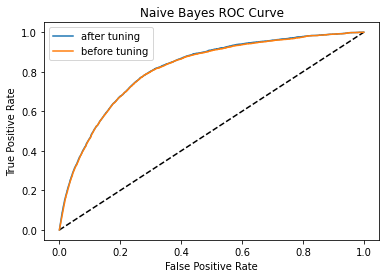

Naive Bayes confusion matrix 
 [[45757 12727]
 [ 1644  3831]]
Naive Bayes classification report 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     58484
           1       0.23      0.70      0.35      5475

    accuracy                           0.78     63959
   macro avg       0.60      0.74      0.61     63959
weighted avg       0.90      0.78      0.82     63959

Naive Bayes ROC AUC score: 0.8168761280062861
Naive Bayes Accuracy: 0.7753091824450038
Naive Bayes f1-score: 0.8200617557164458
Naive Bayes Recall score: 0.6997260273972603


In [25]:
fpr_gnb_tuned, tpr_gnb_tuned, thresholds = roc_curve(y_test, y_pred_probs_gnb_tuned)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_gnb_tuned, tpr_gnb_tuned, label = 'after tuning') # Plot true positive rate against false positive rate
plt.plot(fpr_gnb, tpr_gnb, label = 'before tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_gnb_tuned = roc_auc_score(y_test, y_pred_probs_gnb_tuned)
recall_score_gnb_tuned = recall_score(y_test, y_pred_gnb_tuned)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Naive Bayes confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_gnb_tuned)) # Calculate the confusion matrix
print('Naive Bayes classification report' , '\n' , classification_report(y_test, y_pred_gnb_tuned)) # Calculate the classification report, which gives F1 score
print('Naive Bayes ROC AUC score:', roc_auc_gnb_tuned)
print('Naive Bayes Accuracy:' , accuracy_score(y_test, y_pred_gnb_tuned))
print('Naive Bayes f1-score:', f1_score(y_test, y_pred_gnb_tuned, average='weighted'))
print('Naive Bayes Recall score:' , recall_score(y_test, y_pred_gnb_tuned))

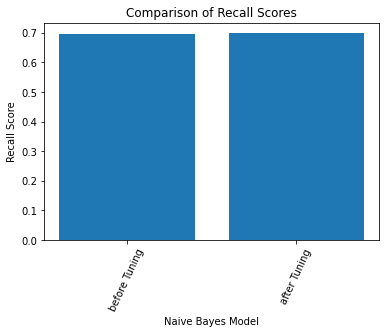

In [26]:
models = ['before Tuning','after Tuning']
recall_scores = [recall_score_gnb,recall_score_gnb_tuned]

_ = plt.bar(models, recall_scores)
_ = plt.title("Comparison of Recall Scores")
_ = plt.xlabel('Naive Bayes Model')
_ = plt.ylabel('Recall Score')
_ = plt.xticks(rotation = 65)

### Training vs Test Scores

In [42]:
y_pred_gnb_tuned_train = gnb_tuned.predict(X_train)
y_pred_probs_gnb_tuned_train = gnb_tuned.predict_proba(X_train)[:, 1]

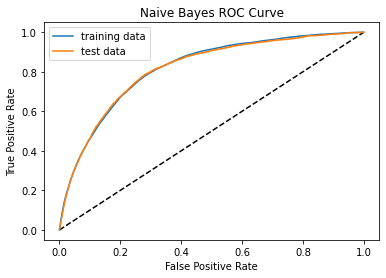

Naive Bayes Training confusion matrix 
 [[182661  51277]
 [  6620  15278]]
Naive Bayes Training classification report 
               precision    recall  f1-score   support

           0       0.97      0.78      0.86    233938
           1       0.23      0.70      0.35     21898

    accuracy                           0.77    255836
   macro avg       0.60      0.74      0.60    255836
weighted avg       0.90      0.77      0.82    255836

Naive Bayes Training ROC AUC score: 0.8166298885939368
Naive Bayes Training Accuracy: 0.7736948670241873
Naive Bayes Training f1-score: 0.8188822898103366
Naive Bayes Training Recall score: 0.6976892866928487


In [44]:
fpr_gnb_tuned_train, tpr_gnb_tuned_train, thresholds = roc_curve(y_train, y_pred_probs_gnb_tuned_train)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_gnb_tuned_train, tpr_gnb_tuned_train, label = 'training data') # Plot true positive rate against false positive rate
plt.plot(fpr_gnb, tpr_gnb, label = 'test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_gnb_tuned_train = roc_auc_score(y_train, y_pred_probs_gnb_tuned_train)
recall_score_gnb_tuned_train = recall_score(y_train, y_pred_gnb_tuned_train)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Naive Bayes Training confusion matrix' , '\n' , confusion_matrix(y_train, y_pred_gnb_tuned_train)) # Calculate the confusion matrix
print('Naive Bayes Training classification report' , '\n' , classification_report(y_train, y_pred_gnb_tuned_train)) # Calculate the classification report, which gives F1 score
print('Naive Bayes Training ROC AUC score:', roc_auc_gnb_tuned_train)
print('Naive Bayes Training Accuracy:' , accuracy_score(y_train, y_pred_gnb_tuned_train))
print('Naive Bayes Training f1-score:', f1_score(y_train, y_pred_gnb_tuned_train, average='weighted'))
print('Naive Bayes Training Recall score:' , recall_score(y_train, y_pred_gnb_tuned_train))

In [49]:
models = ['Training Data','Test Data']
recall_scores = [recall_score_gnb_tuned_train, recall_score_gnb_tuned]
roc_auc_scores = [roc_auc_gnb_tuned_train, roc_auc_gnb_tuned]
train_vs_test_df = pd.DataFrame(
    {'Data Used': models,
     'Recall Score': recall_scores,
     'ROC AUC Score': roc_auc_scores,
    })
train_vs_test_df

,Data Used,Recall Score,ROC AUC Score
0,Training Data,0.697689,0.816630
1,Test Data,0.699726,0.816876


## Gradient Boosting

In [36]:
gb = GradientBoostingClassifier()
gb_param = {
        'n_estimators' : [100,200,400],
        'learning_rate': [1, 0.1, 0.01, 0.001],
        'max_depth': [1, 8, 12],
        'min_samples_leaf': [4, 150],
        }

gb_grid = RandomizedSearchCV(gb, gb_param, cv=8, scoring="recall", n_jobs= -1, verbose = 1)
gb_grid.fit(X_train,y_train)
print(gb_grid.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
{'n_estimators': 100, 'min_samples_leaf': 4, 'max_depth': 12, 'learning_rate': 1}


In [37]:
#retraining with best hyperparameters
gb_tuned = GradientBoostingClassifier(max_depth=12, max_features=0.3, min_samples_leaf=4,
                           n_estimators=100, learning_rate= 1)
gb_tuned.fit(X_train, y_train)

# making predictions on the testing set
y_pred_gb_tuned = gb_tuned.predict(X_test)
y_pred_probs_gb_tuned = gb_tuned.predict_proba(X_test)[:, 1]

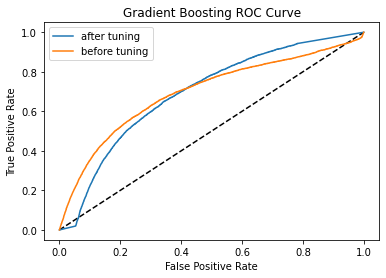

Gradient Boosting confusion matrix 
 [[52682  5802]
 [ 4275  1200]]
Gradient Boosting classification report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     58484
           1       0.17      0.22      0.19      5475

    accuracy                           0.84     63959
   macro avg       0.55      0.56      0.55     63959
weighted avg       0.86      0.84      0.85     63959

Gradient Boosting ROC AUC score: 0.6927295636257226
Gradient Boosting Accuracy: 0.8424459419315499
Gradient Boosting f1-score: 0.8510450574999872
Gradient Boosting Recall score: 0.2191780821917808


In [38]:
fpr_gb_tuned, tpr_gb_tuned, thresholds = roc_curve(y_test, y_pred_probs_gb_tuned)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr_gb_tuned, tpr_gb_tuned, label = 'after tuning') # Plot true positive rate against false positive rate
plt.plot(fpr_gb, tpr_gb, label = 'before tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend()
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

roc_auc_gb_tuned = roc_auc_score(y_test, y_pred_probs_gb_tuned)
recall_score_gb_tuned = recall_score(y_test, y_pred_gb_tuned)


# comparing actual response values (y_test) with predicted response values (y_pred)

print('Gradient Boosting confusion matrix' , '\n' , confusion_matrix(y_test, y_pred_gb_tuned)) # Calculate the confusion matrix
print('Gradient Boosting classification report' , '\n' , classification_report(y_test, y_pred_gb_tuned)) # Calculate the classification report, which gives F1 score
print('Gradient Boosting ROC AUC score:', roc_auc_gb_tuned)
print('Gradient Boosting Accuracy:' , accuracy_score(y_test, y_pred_gb_tuned))
print('Gradient Boosting f1-score:', f1_score(y_test, y_pred_gb_tuned, average='weighted'))
print('Gradient Boosting Recall score:' , recall_score(y_test, y_pred_gb_tuned))

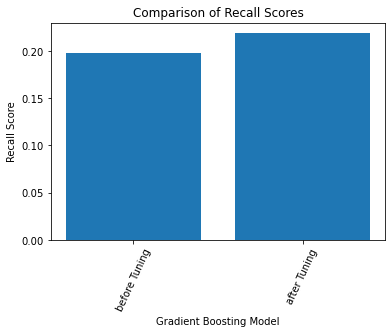

In [39]:
models = ['before Tuning','after Tuning']
recall_scores = [recall_score_gb,recall_score_gb_tuned]

_ = plt.bar(models, recall_scores)
_ = plt.title("Comparison of Recall Scores")
_ = plt.xlabel('Gradient Boosting Model')
_ = plt.ylabel('Recall Score')
_ = plt.xticks(rotation = 65)

# Conclusion

The Naive Bayes has the best recall score of 70%, needs very little tuning, and performs much quicker in comparison to Gradient Boosting.  Furthermore, it doesn't appear to be overfitted to the training data because the training and test recall scores are quite similar.